<a href="https://colab.research.google.com/github/pratz0499/MachineLearning_For_DataScience/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

rnd_state = 4536

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
data=df.dropna()

In [ ]:
predictor=data[['price','units_sold']]
target=data['retail_price']

In [ ]:
pred_train, pred_test, tar_train, tar_test= train_test_split(predictor, target, test_size=4)

In [ ]:
list_estimators = list(range(1, 50, 5))
rf_scoring = []
for n_estimators in list_estimators:
    classifier = RandomForestClassifier(random_state = rnd_state, n_jobs = -1, 
                                        class_weight='balanced', n_estimators=n_estimators)
    score = cross_val_score(classifier, pred_train, tar_train, cv=5, 
                            n_jobs=-1, scoring = 'accuracy') 
    rf_scoring.append(score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

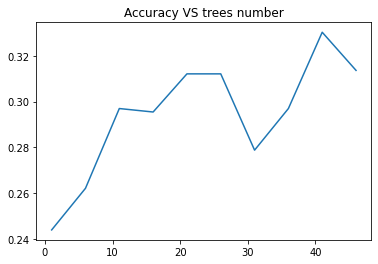

In [ ]:
plt.plot(list_estimators, rf_scoring)
plt.title('Accuracy VS trees number');

In [ ]:
classifier = RandomForestClassifier(random_state = rnd_state, n_jobs = -1, 
                                    class_weight='balanced', n_estimators=20)
classifier.fit(pred_train, tar_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=4536, verbose=0,
                       warm_start=False)

In [ ]:
prediction = classifier.predict(pred_test)

In [ ]:
print('Confusion matrix:\n', pd.crosstab(tar_test, prediction, colnames=['Predicted'], 
                                         rownames=['Actual'], margins=True))
print('\nAccuracy: ', accuracy_score(tar_test, prediction))

Confusion matrix:
 Predicted  2  5  18  All
Actual                  
2          1  0   0    1
5          0  1   0    1
106        0  0   1    1
250        0  0   1    1
All        1  1   2    4

Accuracy:  0.5
